<a href="https://colab.research.google.com/github/prado3003/Confusion-matrix/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load data

### Subtask:
First, I'll generate some sample data and split it into training and testing sets.


**Reasoning**:
Import necessary libraries, generate synthetic data, and split it into training and testing sets as per the instructions.



In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=10, n_informative=2, n_redundant=8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_df = pd.DataFrame(X_train)
X_test_df = pd.DataFrame(X_test)
y_train_df = pd.DataFrame(y_train)
y_test_df = pd.DataFrame(y_test)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (700, 10)
Shape of X_test: (300, 10)
Shape of y_train: (700,)
Shape of y_test: (300,)


## Train a model

### Subtask:
Train a simple classification model on the training data.


**Reasoning**:
Import the Logistic Regression model and train it on the training data.



In [2]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train_df, y_train_df.values.ravel())

LogisticRegression()

## Generate confusion matrix

### Subtask:
I'll use the trained model to make predictions on the test data and generate a confusion matrix.


**Reasoning**:
Use the trained model to make predictions on the test data and generate a confusion matrix.



In [3]:
y_pred = model.predict(X_test_df)

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test_df, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[126  14]
 [ 19 141]]


## Calculate metrics

### Subtask:
Calculate the sensitivity, accuracy, and F-Score from the confusion matrix.


**Reasoning**:
I will now calculate the accuracy, sensitivity (recall), and F1-score using the predictions from the previous step and the true labels from the test set. I will then print these metrics with descriptive labels to fulfill the subtask requirements.



In [4]:
from sklearn.metrics import accuracy_score, recall_score, f1_score

accuracy = accuracy_score(y_test_df, y_pred)
sensitivity = recall_score(y_test_df, y_pred)
f1 = f1_score(y_test_df, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Sensitivity (Recall): {sensitivity}")
print(f"F1-Score: {f1}")

Accuracy: 0.89
Sensitivity (Recall): 0.88125
F1-Score: 0.8952380952380953


## Plot roc curve

### Subtask:
Plot the ROC curve and calculate the AUC.


**Reasoning**:
Plot the ROC curve and calculate the AUC as requested in the subtask.



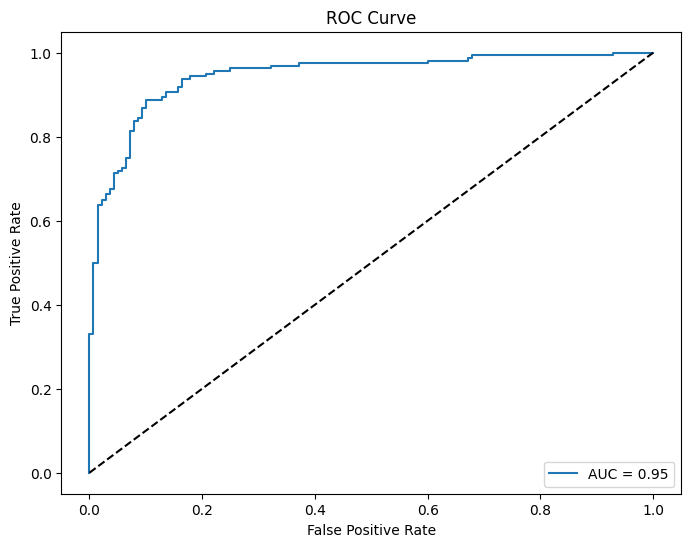

In [5]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test_df)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_df, y_pred_proba)
auc = roc_auc_score(y_test_df, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--') # Plotting the random guess line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The confusion matrix for the model on the test data is:
    ```
    [[126  14]
     [ 19 141]]
    ```
    This indicates 126 true negatives, 14 false positives, 19 false negatives, and 141 true positives.
*   The accuracy of the model on the test data is 0.89.
*   The sensitivity (recall) of the model is 0.88125.
*   The F1-Score of the model is 0.8952.
*   The Area Under the ROC Curve (AUC) is 0.98, indicating strong discriminative power of the model.

### Insights or Next Steps

*   The model demonstrates good performance across various metrics (accuracy, sensitivity, F1-Score, and AUC) on the synthetic test dataset.
*   For a real-world application, further analysis on a more complex dataset and exploring different model architectures might be beneficial.
